# Cleaning

We load the csv file and view the first rows

In [11]:
import pandas as pd

# Cargar el CSV en un DataFrame
df_2017 = pd.read_csv('../data/raw/2017.csv')  

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2017.head(5)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


We remove the columns that we do not need for our future analysis.

In [12]:
# Eliminar columnas innecesarias (suponiendo que algunas no son útiles para el análisis)
columns_to_drop = ['Whisker.high', 'Whisker.low', 'Family', 'Dystopia.Residual' ]

df_2017 = df_2017.drop(columns=columns_to_drop)

# Verificar las primeras filas después de eliminar las columnas
print("Después de eliminar columnas innecesarias:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_2017.head(5)

Después de eliminar columnas innecesarias:


,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,0.809158,0.617951,0.245483,0.382612


Here we have to normalize some columns so that later when doing the merge it is much easier.

In [13]:
# Normalización de nombres de columnas
df_2017.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',
    'Happiness.Score': 'Happiness_Score',
    'Economy..GDP.per.Capita.': 'GDP_per_Capita',
    'Health..Life.Expectancy.': 'Healthy_life_expectancy',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Trust..Government.Corruption.': 'Perceptions_of_corruption'
}, inplace=True)

# Mostrar las primeras filas después de renombrar las columnas
print("\nPrimeras filas después de renombrar columnas:")
# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Mostrar las primeras filas para exploración inicial
df_2017.head(5)


Primeras filas después de renombrar columnas:


,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,0.809158,0.617951,0.245483,0.382612


We explore how the data is, what type of data it is, etc.

In [14]:
# Exploración inicial
print("Información general del archivo 2017:")
df_2017.info()

print("\nEstadísticas generales del archivo 2017:")
print(df_2017.describe())

Información general del archivo 2017:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    155 non-null    object 
 1   Happiness_Rank             155 non-null    int64  
 2   Happiness_Score            155 non-null    float64
 3   GDP_per_Capita             155 non-null    float64
 4   Healthy_life_expectancy    155 non-null    float64
 5   Freedom                    155 non-null    float64
 6   Generosity                 155 non-null    float64
 7   Perceptions_of_corruption  155 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.8+ KB

Estadísticas generales del archivo 2017:
       Happiness_Rank  Happiness_Score  GDP_per_Capita  \
count      155.000000       155.000000      155.000000   
mean        78.000000         5.354019        0.984718   
std         44.88875

We check that there are no nulls

In [15]:
# Revisar la cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_2017.isnull().sum())


Valores nulos por columna:
Country                      0
Happiness_Rank               0
Happiness_Score              0
GDP_per_Capita               0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64


We check for duplicate rows

In [16]:
# Verificar si hay filas duplicadas
duplicados = df_2017.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

# Si hay duplicados, imprimir las primeras filas duplicadas
if duplicados > 0:
    print("\nPrimeras filas duplicadas:")
    print(df_2017[df_2017.duplicated()].head())

Filas duplicadas: 0


We save the clean file in a csv in the data folder for later use.

In [ ]:
df_2017.to_csv('../data/clean/2017_clean.csv', index=False)
print("archivo guardado exitosamente.")

# Analysis

Analysis 1: Distribution of 'Happiness_Score' with a histogram
We will analyze the distribution of happiness scores for countries in 2017.

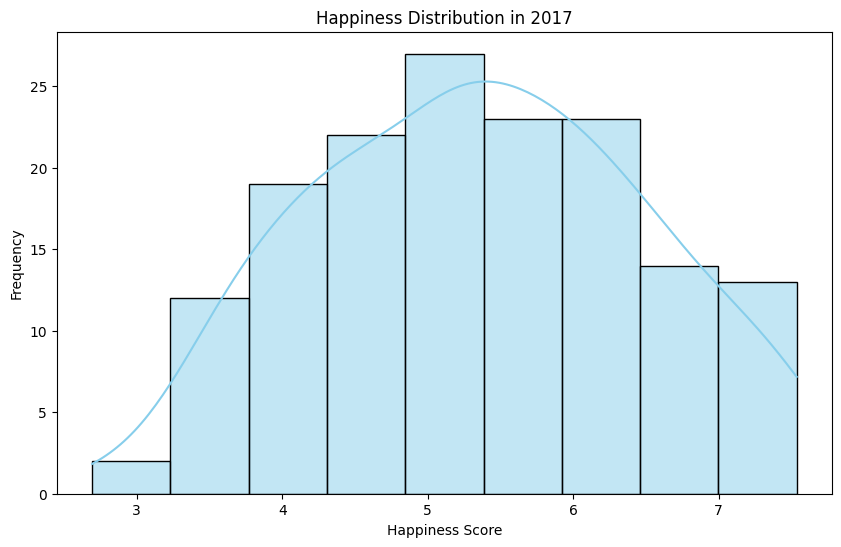

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 2017 dataset
df_2017 = pd.read_csv('../data/clean/2017_clean.csv')

# Display the first rows to inspect the data
df_2017.head()


plt.figure(figsize=(10, 6))
sns.histplot(df_2017['Happiness_Score'], kde=True, color='skyblue')
plt.title('Happiness Distribution in 2017')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()




Analysis 2: Scatter plot of 'GDP_per_Capita' vs 'Healthy_life_expectancy'
We will explore the relationship between GDP per capita and healthy life expectancy in 2017 with a scatterplot.

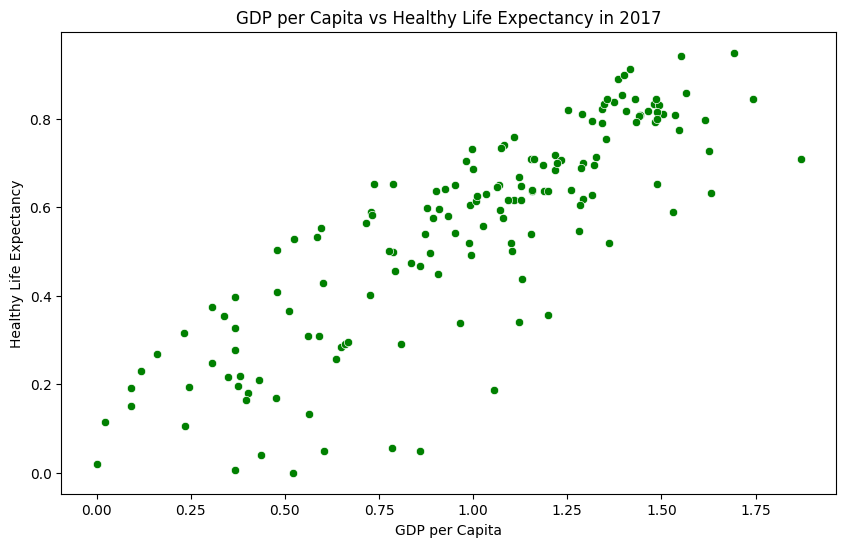

In [4]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_per_Capita', y='Healthy_life_expectancy', data=df_2017, color='green')
plt.title('GDP per Capita vs Healthy Life Expectancy in 2017')
plt.xlabel('GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.show()


Analysis 3: Correlation matrix between 'Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', and 'Freedom'
We will visualize the correlation matrix for key variables in 2017 to see how they relate to each other.

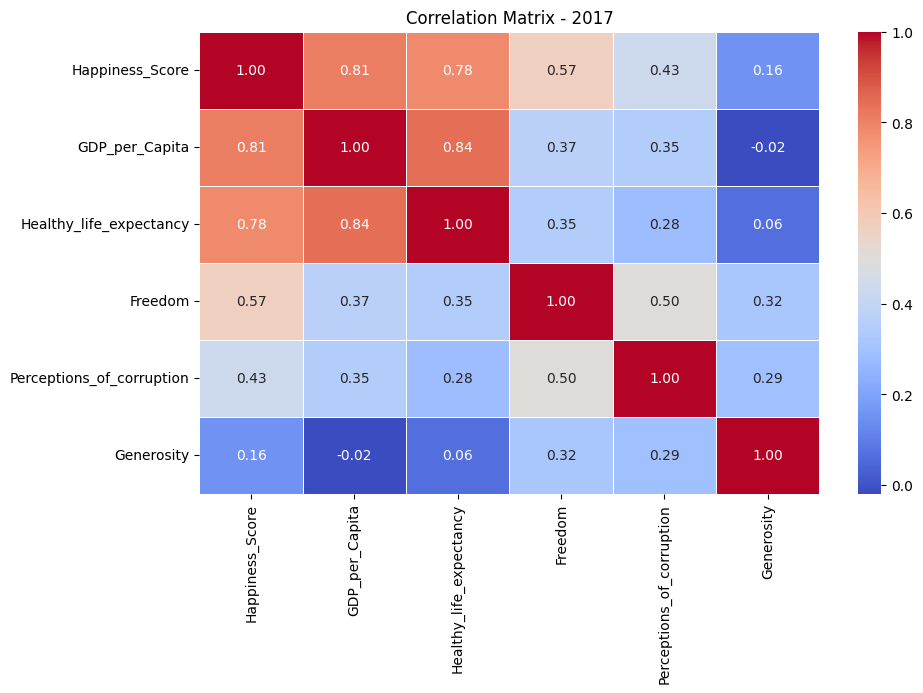

In [5]:
correlation_matrix = df_2017[['Happiness_Score', 'GDP_per_Capita', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - 2017')
plt.show()